In [1]:
import numpy as np

In [2]:
data = [4, 5, 6, np.nan]
mean = 4

In [3]:
def missing_value(data, mean):
    """finds the missing value in the data given the mean"""
    number_of_values = len(data)
    # use np.nansum() adds all elements in an array tresating nan's as zeros
    return (mean * number_of_values) - np.nansum(data)
    

In [4]:
missing_value(data, mean)

1.0

In [5]:
def iqr(arr):
    """Will return the interquartile range given an array of data"""
    # Step 1: split the array into two halfs considering the length of the array
    # '//' floor division (rounds down to the nearest whole number)
    split = len(arr) // 2
    print("Length=", len(arr))
    print('split=', split)
    # Step 2: take all of the variables to the left of the median 
    first_half = arr[:split]
    print('first_half=', first_half)
    # Step 3: take all of the variables to the right of the median considering the length of the array
    if len(arr) % 2 == 0:
        second_half = arr[split:]
       # if the array is even do not add one else add one to split equally
    else:
        second_half = arr[split + 1:]
    print('second_half=', second_half)
    # Step 4: calcualte 1st quartile 
    q1 = np.median(first_half)
    print('Q1=', q1)
    # calculate 3rd quartile
    q3 = np.median(second_half)
    print('Q3=', q3)
    # Step 5: find the difference and return the interquartile range
    return q3 - q1
    

In [6]:
arr1 = [0,1.5,2.5,3,4,4,4,7,7.5]
iqr(arr1)


Length= 9
split= 4
first_half= [0, 1.5, 2.5, 3]
second_half= [4, 4, 7, 7.5]
Q1= 2.0
Q3= 5.5


3.5

In [7]:
arr = [6,5,13,8]
# round to the nearest hundreth
round(np.std(arr, ddof = 0), 2)

3.08

In [8]:
def variance_mean(arr, target):
    """Returns the mean and variance rounded to the nearest tenth
    given the parameter of sample or population"""
    if target == 'sample':
        print('mean =', round(np.mean(arr), 1))
        print('variance=', round(np.var(arr, ddof = 1), 1))
        return np.mean(arr), np.var(arr)
    else:
        print('mean =', round(np.mean(arr), 1))
        print('variance=', round(np.var(arr, ddof = 0), 1))
        return np.mean(arr), np.var(arr)

In [9]:
arr = [22,13,18,16]
variance_mean(arr, 'idk')

mean = 17.2
variance= 10.7


(17.25, 10.6875)

In [10]:
def standard_deviation_mean(arr, target):
    """Returns the mean and variance rounded to the nearest tenth
    given the parameter of sample or population"""
    if target == 'sample':
        mean = round(np.mean(arr), 1)
        std = round(np.std(arr, ddof = 1), 1)
        print('mean =', mean)
        print('std=', std)
        return mean, std
    else:
        print('mean =', round(np.mean(arr), 1))
        print('std=', round(np.std(arr, ddof = 0), 1))
        return np.mean(arr), np.std(arr)

In [11]:
arr = [16,10,5,7,13]
standard_deviation_mean(arr, 'pop')

mean = 10.2
std= 4.0


(10.2, 3.9698866482558417)

In [12]:
import numpy as np

In [13]:
arr = [1.2, 1.2, 1.2, 1.2, 1.3, 1.3, 1.3, 1.3, 1.3, 1.4, 1.4, 1.4, 1.5, 1.6, 1.6]

In [14]:
np.percentile(arr, 1.5)

1.2

In [15]:
# calculating zscores with formula no packages
def zscore(mean, std, value):
    """returns zscore given ints of mean, std and target value"""
    return (value - mean) / std
zscore(67,5.5,53)

-2.5454545454545454

In [16]:
from numpy.random import normal
from scipy.stats import norm
import matplotlib.pyplot as plt

In [19]:
def plot_normal(mean, std, target1, target2 = target1):
    """plots a normal distribution when given mean and std; 
    can visualize two targets and the space between"""
    # we want an array of data points to create our graph, 
    # as long as we maintain the same mean and std values do not matter
    data = normal(mean, std, 1000)
    # sort the data from smallest to largest because if you don't...
    data.sort()
    # probability distribution of the data 
    pdf = norm.pdf(data, mean, std)
    # vertical lines dashed to distinguish, mean, target1 and target 2 can change **kwargs
    plt.axvline(mean, 0, 1, linestyle = '--', label = 'mean' )
    plt.axvline(target1, 0,1, linestyle = '--', color = 'red', label = 'target1')
    plt.axvline(target2, 0,1, linestyle = '--', color = 'red', label = 'target2')
    plt.legend()
    # Always label your visualizations
    plt.xlabel('Values in Data')
    plt.ylabel('Density')
    plt.title('Normal Distribution')
    plt.axvspan(target1, target2, ymin=0, ymax=1, alpha=0.5, color='red')
    plt.plot(data, pdf) 

In [20]:
data = [1, 2, 3, 4, 5]

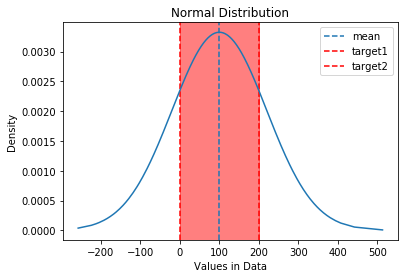

In [21]:
# you can use one line of code when you are defining multiple variables, may be easier
mean, std, target1, target2 =   100, 120, 200, 0
plot_normal(mean, std, target1, target2)

In [51]:
def above_below(mean, std, target1, proportion):
    if proportion == 'higher':
        print(round(1 - norm(mean, std).cdf(target1), 4))
        return round(1 - norm(mean, std).cdf(target1), 4)
    elif proportion == 'lower':
        print(round(norm(mean, std).cdf(target1), 4))
        return round(norm(mean, std).cdf(target1), 4)
    else:
        print('higher or lower?')

In [68]:
mean, std, target1 = 0, 1, -1.74
above_below(mean, std, target1, "lower")

0.0409


0.0409

In [67]:
above_below(mean, std, target1 * -1, "lower") + above_below(mean, std, target1, "higher") 

0.0082
0.0082


0.0164

In [24]:
def two_points(mean, std, target1, target2):
    higher = round(norm(mean, std).cdf(target2), 4)
    lower = round(norm(mean, std).cdf(target1), 4)
    print(round(higher - lower, 4))

In [25]:
mean, std, target1, target2 = 0, np.sqrt(162), -15, 15
two_points(mean, std, target1, target2)

0.7614


In [26]:
mean, std, percent = 80, 9, .4
def percentage(mean, std, percent,  minomax):
    if minomax == 'max':
        print(norm(mean, std).ppf(percent))
    else:
        print(norm(mean, std).ppf(1 - percent))
percentage(mean, std, percent, 'max')

77.7198760717778


In [92]:
sx = 30.8
sy = 35
xbar = 57.4
ybar = 69.9
r = 0.99

In [93]:
def equation_line_best_fit(sx, sy, xbar, ybar):
    slope = r * (sy/sx)
    constant = (slope * xbar)
    yintercept = (ybar - constant)
    print("yhat = ", slope, "x +", yintercept)
    return round(slope, 2), round(yintercept, 2)
equation_line_best_fit(sx, sy, xbar, ybar)

yhat =  1.1249999999999998 x + 5.325000000000017


(1.12, 5.33)

In [29]:
# expected value 
# data = [0, 100, 250, 500, 1000]
# prob = [0.0625, 0.25, 0.375, 0.25, 0.0625]
# data = [0,1,2]
# prob = [0.09, 0.42, 0.49]
data = [-5, 5]
prob = [(20/38), (18/38) ]
mean = sum(map(lambda x, y: x * y, data, prob))
mean

-0.26315789473684204

In [30]:
# standard deviation/variance of expected value
variance = sum(map(lambda x, z: ((x - mean)**2) * z, data, prob))
std= np.sqrt(variance)
round(variance, 2), round(std, 2)

(24.93, 4.99)

In [31]:
from scipy.special import comb 
def binomial_probability(trials, rvv, prob):
    print("k =",trials)
    print("n =", rvv)
    print((prob**rvv))
    print((1-prob), "^", (trials - rvv))
    return comb(trials, rvv) * (prob**rvv) * (1-prob)**(trials - rvv)
        

In [32]:
trials, rvv, prob = 5, 5, 0.5
binomial_probability(trials, rvv, prob)

k = 5
n = 5
0.03125
0.5 ^ 0


0.03125

In [33]:
binomial_probability(trials, 1, prob) + binomial_probability(trials, 2, prob)

k = 5
n = 1
0.5
0.5 ^ 4
k = 5
n = 2
0.25
0.5 ^ 3


0.46875

In [34]:
# expected value 
data = [0, 1, 2, 3, 4]
trials = 4
prob = 0.5
prob = [binomial_probability(trials, 0, prob),
        binomial_probability(trials, 1, prob), 
        binomial_probability(trials, 2, prob), 
        binomial_probability(trials, 3, prob), 
        binomial_probability(trials, 4, prob)]
mean = sum(map(lambda x, y: x * y, data, prob))
mean

k = 4
n = 0
1.0
0.5 ^ 4
k = 4
n = 1
0.5
0.5 ^ 3
k = 4
n = 2
0.25
0.5 ^ 2
k = 4
n = 3
0.125
0.5 ^ 1
k = 4
n = 4
0.0625
0.5 ^ 0


2.0

In [35]:
def normal_conditions(n, p):
    if n * p >= 10 and (n * (1 - p)) >= 10:
        print("normal distribution")
        return "normal distribution"
    else:
        if p < 0.40:
            print('right skewed')
            return 'right'
        else:
            print('left skewed')
            return 'left'
        

In [37]:
def sample_prob1(truep, n, sample_phat, target):
    if normal_conditions(n, truep) == 'normal distribution':
        mean_phat = truep
        std_phat = np.sqrt((truep * (1 - truep)) / n)
        print("mean=", mean_phat,"std=", round(std_phat, 2))
       # above_below(mean_phat, std_phat, sample_phat, target)
      

In [38]:
sample_prob1(0.8, 75,  0, "lower")

normal distribution
mean= 0.8 std= 0.05


In [39]:
def sample_prob2(truep, n, target1, target2):
    if normal_conditions(n, truep) == 'normal distribution':
        mean_phat = truep
        std_phat = np.sqrt((truep * (1 - truep)) / n)
        print("mean=", mean_phat,"std=", round(std_phat, 2))
        return  two_points(mean_phat, std_phat, target1, target2)

In [40]:
sample_prob2(0.8, 500, 0.79, 0.81) 

normal distribution
mean= 0.8 std= 0.02
0.4238


In [41]:
def sample_distribution_probability1(mean, std, n, target, highlow):
    muhat = mean
    stdhat = std / (np.sqrt(n))
    print('std hat', stdhat)
    return above_below(muhat, stdhat, target, highlow)


In [42]:
sample_distribution_probability1(20, 5, 3, 21, "higher")

std hat 2.886751345948129
0.3645


In [43]:
above_below(0.30, 0.03742, 0.36, 'higher')


0.0544


In [44]:
def sample_distribution_probability2(mean, std, n, target1, target2):
    muhat = mean
    stdhat = std / (np.sqrt(n))
   # print('std hat', stdhat)
    return two_points(muhat, stdhat, target1, target2)


In [46]:
two_points(0.8, 0.017889, 0.79, 0.81)

0.4238


In [2]:
import pandas as pd
import numpy as np

In [5]:
arr = np.arange(0, 1000, dtype = 'int64')
df = pd.DataFrame(arr)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
0    1000 non-null int64
dtypes: int64(1)
memory usage: 7.9 KB


In [11]:
df.loc[(df[0] > 40) & (df[0] < 50)]

,0
41,41
42,42
43,43
44,44
45,45
46,46
47,47
48,48
49,49
